<a href="https://colab.research.google.com/github/Dms-zi/DeepLearning_Pytorch/blob/main/Pytorch_Tutorial/AssociationRulesTutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install efficient-apriori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from efficient_apriori import apriori

In [ ]:
df=pd.read_csv("/content/Market_Basket_Optimization.csv")
df

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7496,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
my=df.values.reshape(-1).tolist()

#creating a df
df_list=pd.DataFrame(my)
df_list["Count"]=1

df_list=df_list.groupby(by=[0],as_index=False).count().sort_values(by=['Count'], ascending=True)
df_list=df_list.rename(columns={0:'Item'})
df_list

,Item,Count
0,asparagus,1
112,water spray,3
77,napkins,5
34,cream,7
11,bramble,14
...,...,...
25,chocolate,1230
43,french fries,1282
100,spaghetti,1306
37,eggs,1348


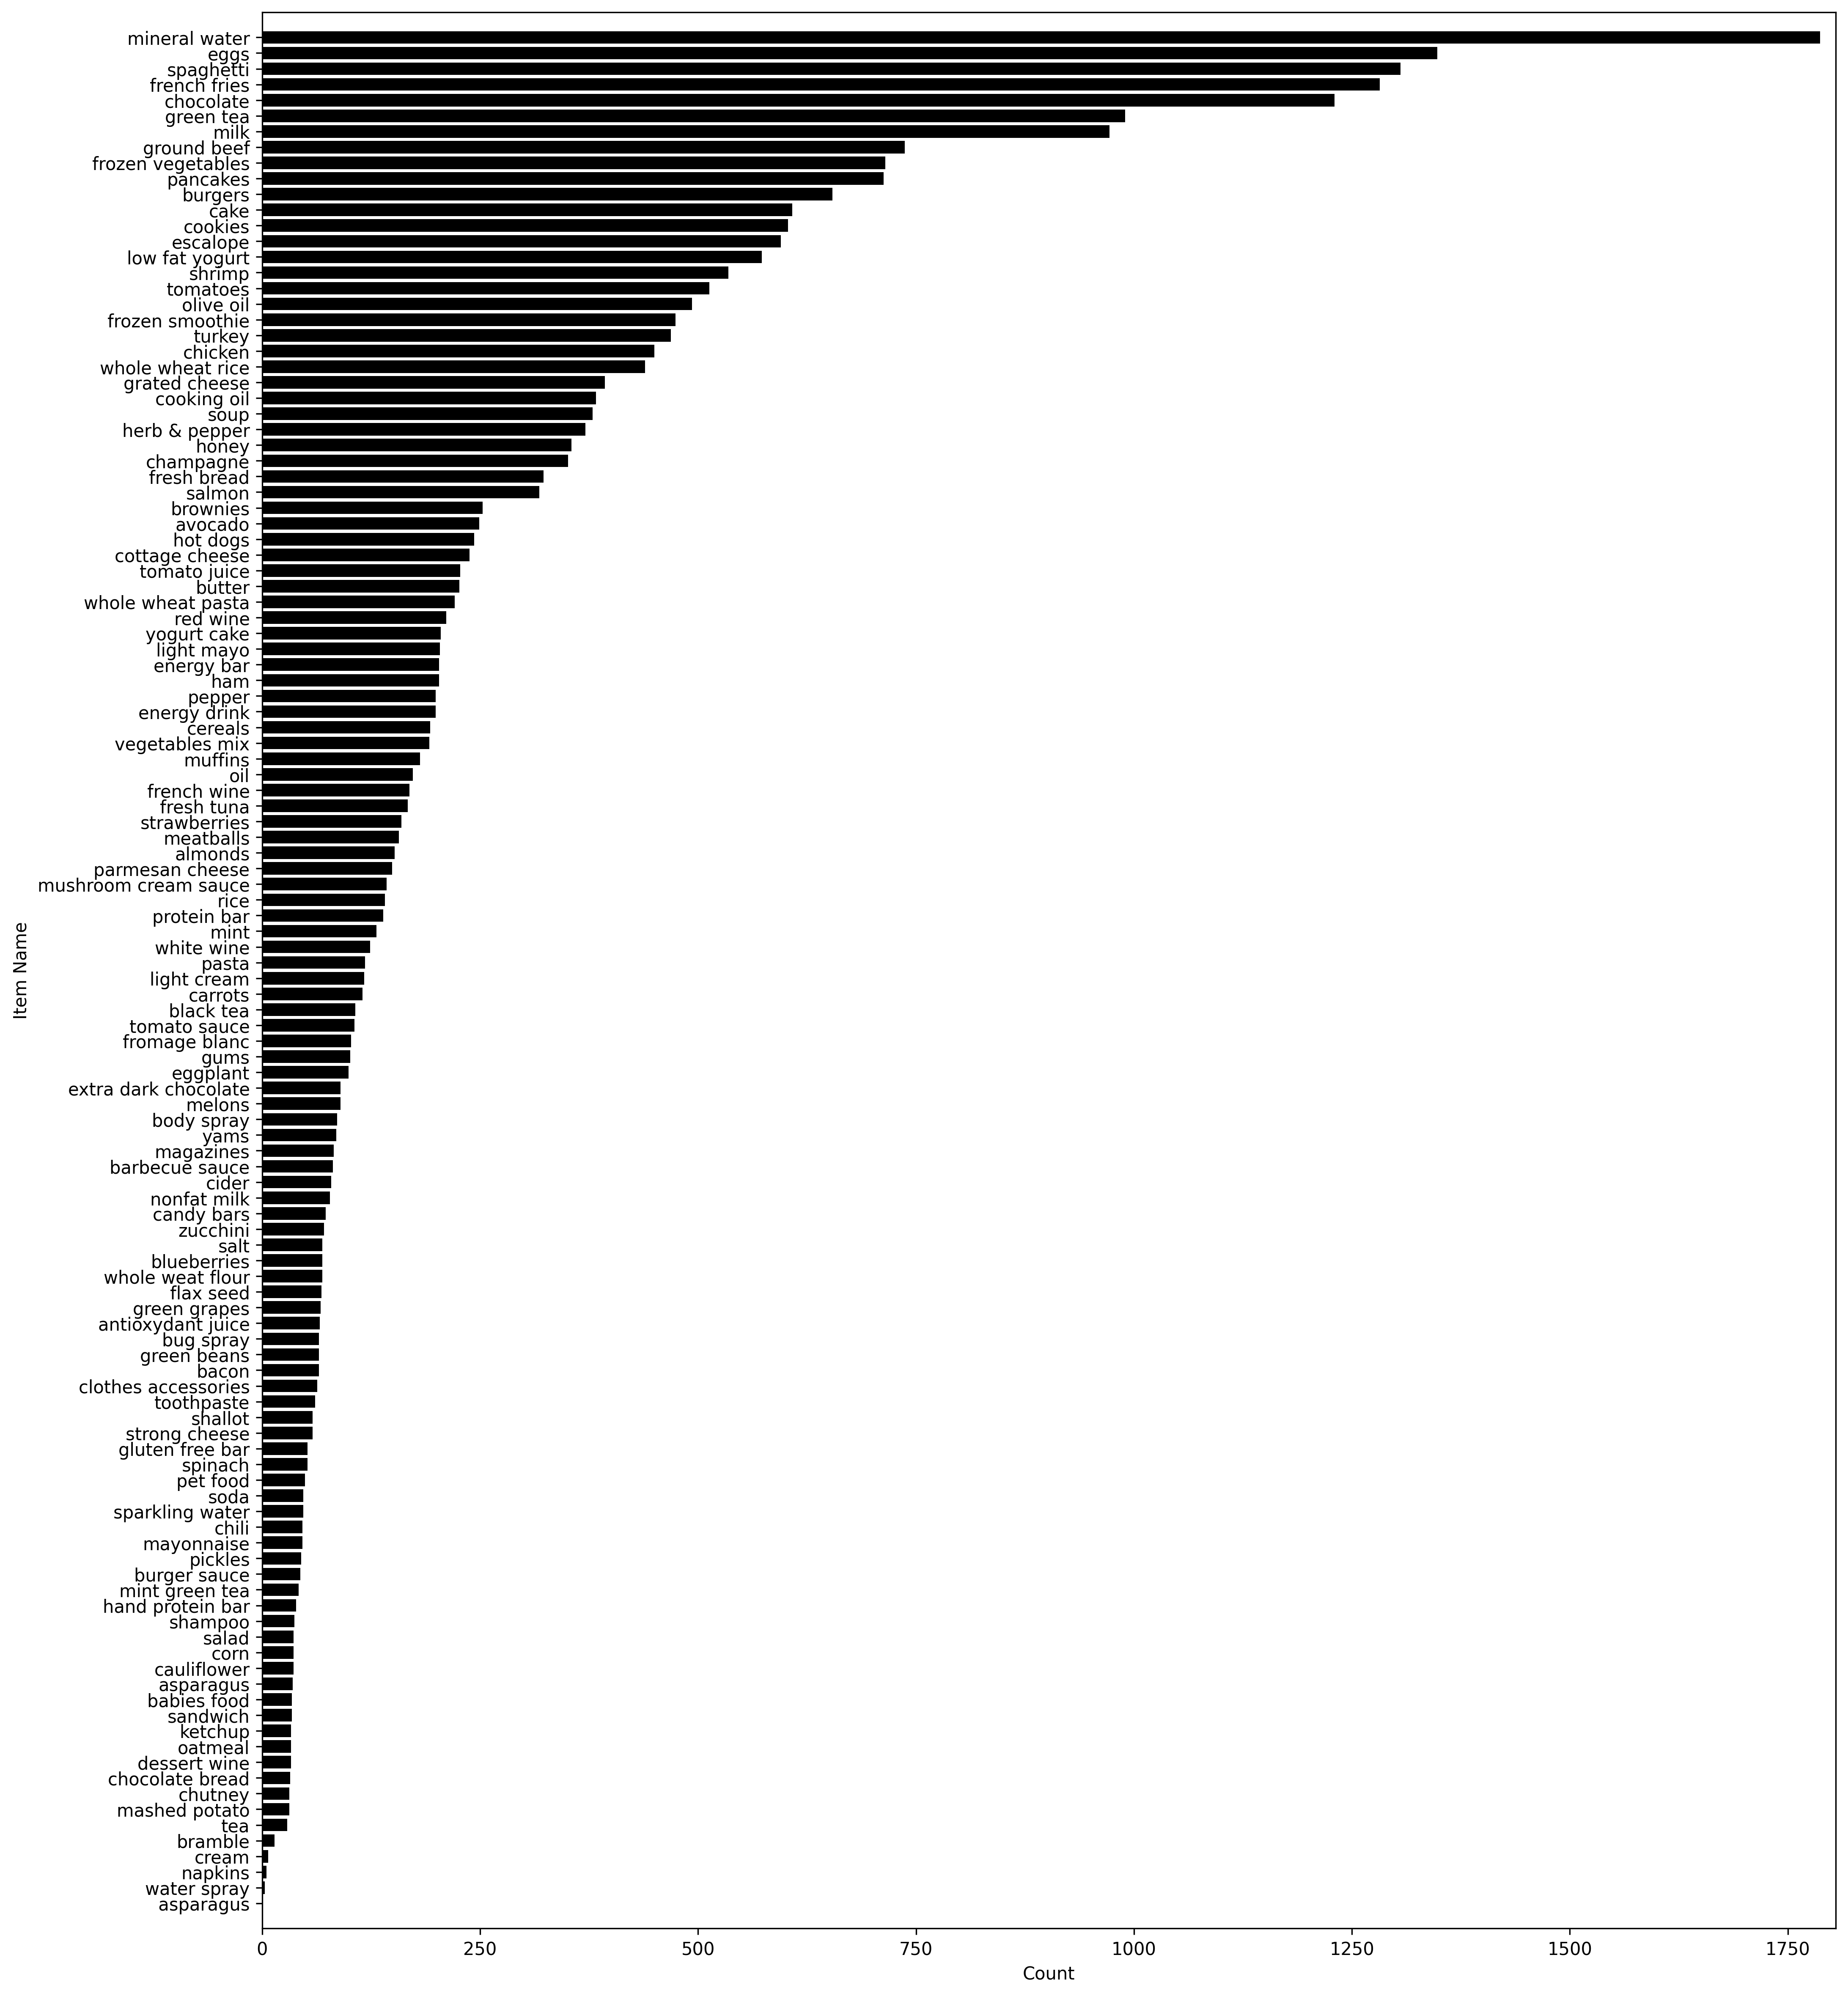

In [ ]:
plt.figure(figsize=(16,20), dpi=300)
plt.ylabel('Item Name')
plt.xlabel('Count')
plt.barh(df_list['Item'], width=df_list['Count'], color='black', height=0.8)
plt.margins(0.01)   
plt.show()

In [ ]:
mydata2=df.stack().groupby(level=0).apply(list).tolist()
# Show what it looks like
mydata2

[['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries'],
 ['eggs', 'pet food'],
 ['cookies'],
 ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'],
 ['spaghetti', 'champagne', 'cookies'],
 ['mineral water', 'salmon'],
 ['mineral water'],
 ['shrimp',
  'chocolate',
  'chicken',
  'honey',
  'oil',
  'cooking oil',
  'low fat yogurt'],
 ['turkey', 'eggs'],
 ['turkey',
  'fresh tuna',
  'tomatoes',
  'spaghetti',
  'mineral water',
  'black tea',
  'salmon',
  'eggs',
  'chicken',
  'extra dark chocolate'],
 ['meatballs', 'milk', 'honey', 'french fries', 'protein bar'],
 ['red wine', 'shrimp', 'pasta', 'pepper', 'eggs', 'chocolate', 'shampoo'],
 ['rice', 'sparkling water'],
 ['spaghetti', 'mineral water', 'ham', 'body spray',

In [ ]:
itemsets, rules = apriori(mydata2, min_support=0.03, min_confidence=0.2)

In [ ]:
for item in sorted(rules, key=lambda item: (item.lift,item.conviction), reverse=True):
    print(item)

{ground beef} -> {spaghetti} (conf: 0.399, supp: 0.039, lift: 2.291, conv: 1.374)
{spaghetti} -> {ground beef} (conf: 0.225, supp: 0.039, lift: 2.291, conv: 1.164)
{ground beef} -> {mineral water} (conf: 0.417, supp: 0.041, lift: 1.748, conv: 1.306)
{frozen vegetables} -> {mineral water} (conf: 0.375, supp: 0.036, lift: 1.573, conv: 1.218)
{milk} -> {spaghetti} (conf: 0.274, supp: 0.035, lift: 1.572, conv: 1.137)
{spaghetti} -> {milk} (conf: 0.204, supp: 0.035, lift: 1.572, conv: 1.093)
{milk} -> {mineral water} (conf: 0.370, supp: 0.048, lift: 1.554, conv: 1.210)
{mineral water} -> {milk} (conf: 0.201, supp: 0.048, lift: 1.554, conv: 1.090)
{milk} -> {chocolate} (conf: 0.248, supp: 0.032, lift: 1.513, conv: 1.112)
{pancakes} -> {mineral water} (conf: 0.355, supp: 0.034, lift: 1.489, conv: 1.181)
{spaghetti} -> {mineral water} (conf: 0.343, supp: 0.060, lift: 1.440, conv: 1.159)
{mineral water} -> {spaghetti} (conf: 0.251, supp: 0.060, lift: 1.440, conv: 1.102)
{chocolate} -> {spaghett

In [ ]:
print(itemsets)

{1: {('burgers',): 654, ('eggs',): 1348, ('turkey',): 469, ('avocado',): 249, ('mineral water',): 1787, ('milk',): 972, ('whole wheat rice',): 439, ('green tea',): 990, ('low fat yogurt',): 573, ('french fries',): 1282, ('soup',): 379, ('frozen vegetables',): 715, ('spaghetti',): 1306, ('cookies',): 603, ('cooking oil',): 383, ('champagne',): 351, ('salmon',): 318, ('shrimp',): 535, ('chocolate',): 1229, ('chicken',): 450, ('honey',): 355, ('tomatoes',): 513, ('pancakes',): 713, ('grated cheese',): 393, ('fresh bread',): 323, ('ground beef',): 737, ('frozen smoothie',): 474, ('escalope',): 595, ('herb & pepper',): 371, ('cake',): 608, ('cottage cheese',): 238, ('hot dogs',): 243, ('brownies',): 253, ('olive oil',): 493, ('butter',): 226, ('tomato juice',): 227}, 2: {('chocolate', 'eggs'): 249, ('chocolate', 'french fries'): 258, ('chocolate', 'milk'): 241, ('chocolate', 'mineral water'): 395, ('chocolate', 'spaghetti'): 294, ('eggs', 'french fries'): 273, ('eggs', 'milk'): 231, ('eggs'